In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from src.signals.daily.dataset_features import create_features_dataframe
from src.signals.daily.train_model import predict_arima_returns, predict_linear_returns, predict_xgbregressor_returns

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_serie(df):
    plt.figure(figsize=(12,6))
    plt.plot(df['Close'].values)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Close")
    plt.legend()
    plt.show()
def plot_two_series(df1, df2, label_model, label1='predict', label2='real'):
    if not df1.index.equals(df2.index):
        raise ValueError("DataFrames must have the same index.")
    if df1.shape != df2.shape:
        raise ValueError("DataFrames must have the same shape.")
    y_pred = df1.values.flatten()
    y_true = df2.values.flatten()

    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    plt.figure(figsize=(12, 6))
    plt.plot(df1.index, y_pred, label=label1)
    plt.plot(df2.index, y_true, label=label2)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"{label_model} — RMSE = {rmse:.6f}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
def plot_smoothed_series(df1, df2, label1='predicted', label2='real', window=5):
    if not df1.index.equals(df2.index):
        raise ValueError("DataFrames must have the same index.")

    smooth1 = df1.rolling(window=window).mean()
    smooth2 = df2.rolling(window=window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(smooth1, label=f"{label1} (MA-{window})")
    plt.plot(smooth2, label=f"{label2} (MA-{window})")
    plt.xlabel("Date")
    plt.ylabel("Smoothed Value")
    plt.title(f"{label1} vs {label2} (Smoothed over {window} days)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\ALrig\AppData\Local\Temp\ipykernel_22192\2062893454.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


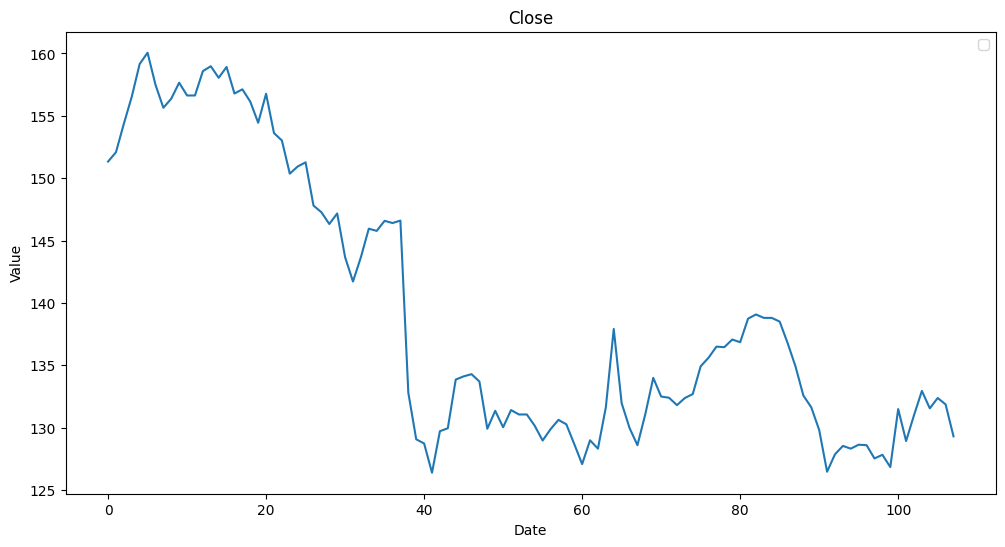

In [8]:
df = create_features_dataframe('AIR.PA', '2024-05-01', '2024-10-01')
plot_serie(df)

### Prediction of return t+1 with Arima

In [ ]:
df_arima = predict_arima_returns(df, 15)

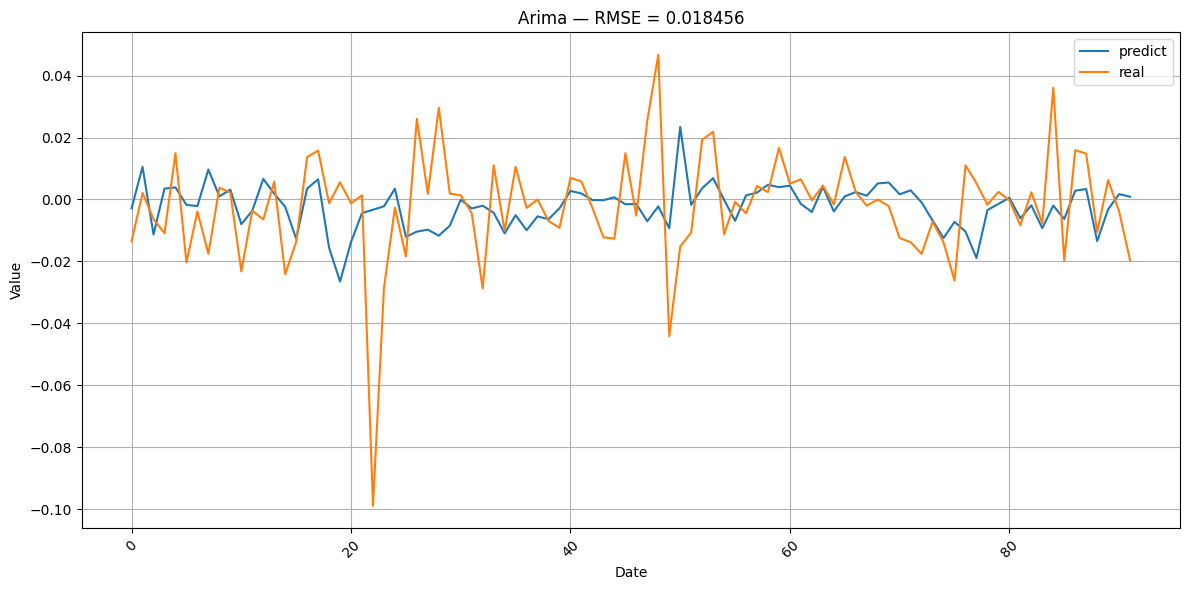

In [15]:
plot_two_series(df_arima['predict_return_t'], df_arima['return_t'], "Arima")

### Prediction of return t+1 with Linear Model

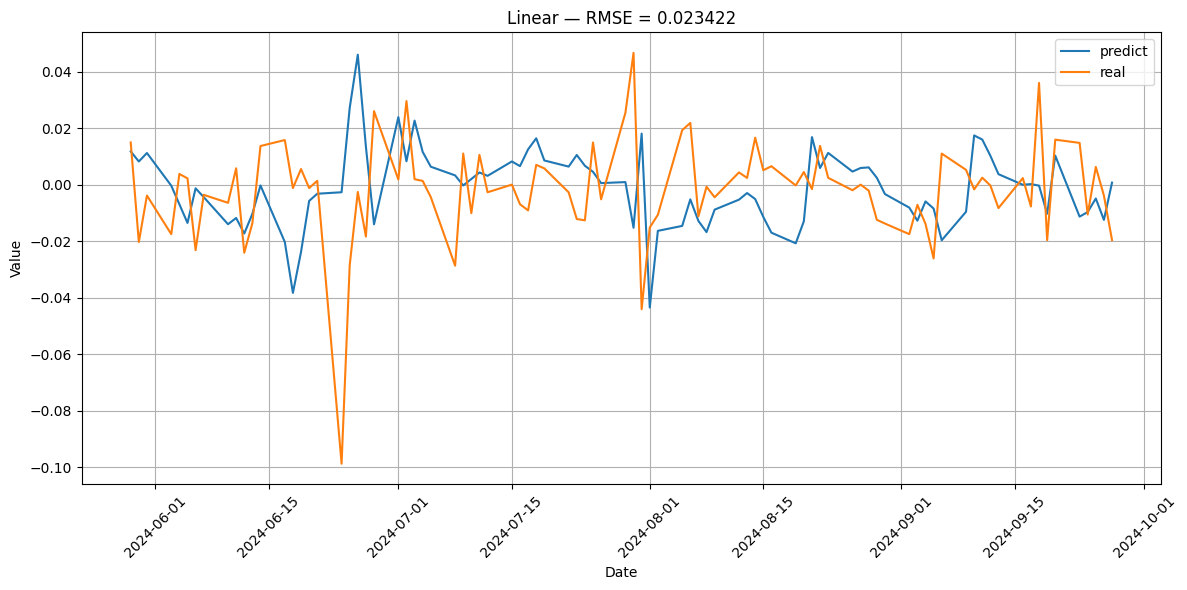

In [16]:
df_linear = predict_linear_returns(df, 15)
plot_two_series(df_linear['predict_return_t'], df_linear['return_t'], "Linear")

### Prediction of return t+1 with Gradient Boosted Tree

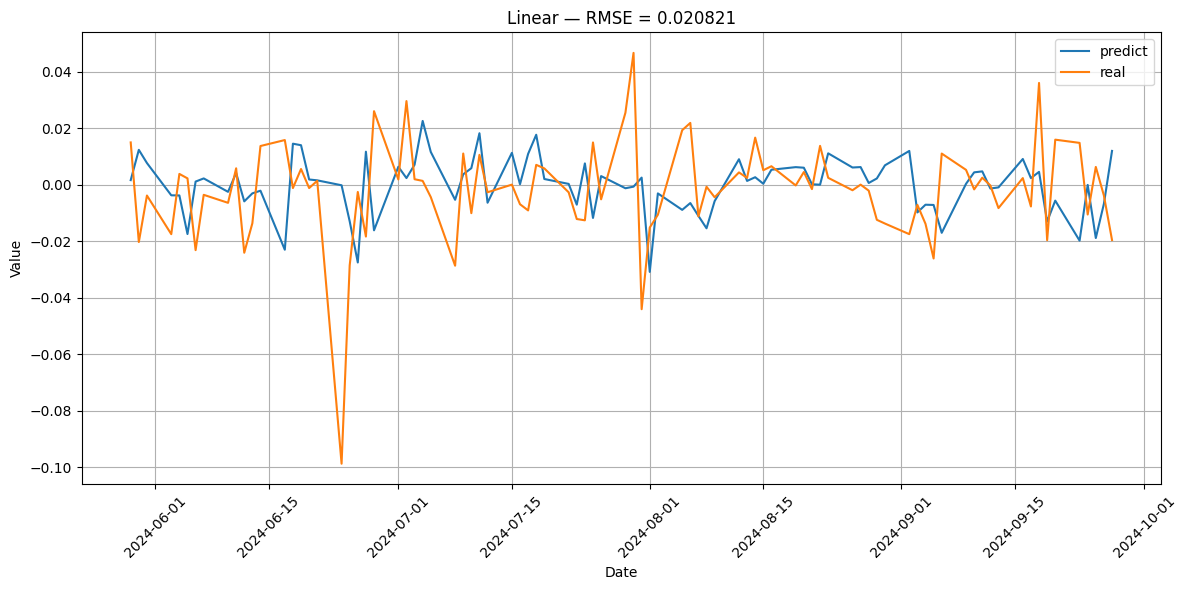

In [17]:
df_xgbr = predict_xgbregressor_returns(df, 15)
plot_two_series(df_xgbr['predict_return_t'], df_xgbr['return_t'], "Linear")